# Week 12: 資料兼課題

## 0. この資料の目標

### トピック

- 最適成長モデル（ラムゼー・モデル）

### モデルの概要

- 企業の行動はソロー・モデルとほぼ同じ。
- 家計は異時点間の最適化問題を解いて消費と貯蓄を決める。


#### 企業の行動

利潤最大化条件

$$
\begin{aligned}
\frac{\partial F}{\partial K}(K_{t-1},A_{t-1}L_{t-1}) = f'(k_{t-1}) =r_{t}+\delta
\end{aligned}
$$

- $\delta$: 資本減耗率
- $k_t = K_t/(A_t L_t)$: は効率労働当たりの資本。
- $r$: 実質利子率

これと資本蓄積の方程式が重要。

$$
K_{t}-K_{t-1}=Y_{t}-C_{t}-\delta K_{t-1}
$$

$I = Y - C = S$ は投資。ソローモデルと違って，貯蓄（投資）が内生的に決まる。


これを効率労働当たりの変数に書き換えたものが次の方程式。

$$
k_{t}=\frac{f(k_{t-1})-c_{t}+(1-\delta)k_{t-1}}{(1+g)(1+n)}
$$



#### 家計の行動

- $\bar{c} = C/L$: 1人当たりの消費, 
- $\bar{s}$: 1人当たりの貯蓄,  
- $w$: 労働所得,  
- $\beta$: 割引因子,  
- $n$: 人口成長率,  
- $u$: 瞬時効用関数,  
- $r$: 実質利子率
- $R_t$: 累積実質利子率を人口増加率で調整したもの

家計は次の効用最大化問題を解く。

$$
\begin{aligned}
&\max\sum_{t=1}^{\infty}\left\{ \beta(1+n)\right\} ^{t-1}u(\bar{c}_{t})\\
&\text{subject to}\\
&\qquad\sum_{t=1}^{\infty}\frac{\bar{c}_{t}}{1+R_{t}}\le\sum_{t=1}^{\infty}\frac{w_{t}}{1+R_{t}}+\bar{s}_{0}
\end{aligned}
$$

隣り合う2期間について，2期間モデルと同様の最適条件が得られる。

$$
\frac{u'(\bar{c}_{t})}{u'(\bar{c}_{t+1})}=\beta(1+r_{t+1})
$$

CRRA効用関数 $u(c) = (c^{1-\theta}-1) / (1-\theta)$ を仮定，効率労働あたりの消費 $c_t = C_t / (A_{t-1}L_{t-1})$ に書き直すと次のように変形できる。

$$
\frac{c_{t+1}}{c_{t}}
=\frac{\left\{ \beta(1+r_{t+1})\right\} ^{1/\theta}}{1+g}
$$


#### 均衡

市場を通じて企業と家計が結びつく。特に，

- 家計が直面する利子率，賃金は企業の生産活動によって決まる
- 企業の投資資金は家計の貯蓄によって供給される。

ことに注意すると，経済のダイナミクスは以下の方程式で定まることがわかる。


$$
\begin{aligned}
k_{t} &= \frac{f(k_{t-1})-c_{t}+(1-\delta)k_{t-1}}{(1+g)(1+n)}\\
\frac{c_{t+1}}{c_{t}}
&= \frac{\left\{ \beta(1+r_{t+1})\right\} ^{1/\theta}}{1+g}
\end{aligned}
$$


ただし，初期値は $k_0$ が与えられている。


### 目標

- ラムゼーモデルの数値解法の1つを身につける。
- この資料の解法は，蓮見 (2020) 『動学マクロ経済学へのいざない』日本評論社 の2章を参考にした。

### 提出方法

Teams の課題として提出

### 締切

8月７日

### 準備

まず，必要なライブラリをインポートしてください。

In [2]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import sympy as sp
sp.init_printing()

## 考え方

- 初期値の数が足りないので普通のシミュレーションの方法は使えない。
- 終端条件（横断性条件）が最適性により定まるので，それを使う。

次の連立方程式を解くことを考える。

$$
\begin{align}
k_{1} =\frac{f(k_{0})-c_{1}+(1-\delta)k_{0}}{(1+g)(1+n)},
&\quad 
c_{2} =\frac{c_{1}\left[\beta\left\{ f'(k_{0})+1-\delta\right\} \right]^{1/\theta}}{1+g}
\\
k_{2} =\frac{f(k_{1})-c_{2}+(1-\delta)k_{1}}{(1+g)(1+n)}, 
&\quad
c_{3} =\frac{c_{2}\left[\beta\left\{ f'(k_{1})+1-\delta\right\} \right]^{1/\theta}}{1+g}
\\
k_{3} =\frac{f(k_{2})-c_{3}+(1-\delta)k_{2}}{(1+g)(1+n)},
&\quad 
c_{4} =\frac{c_{3}\left[\beta\left\{ f'(k_{2})+1-\delta\right\} \right]^{1/\theta}}{1+g}
\\
\qquad \vdots\\
k_{T} = \frac{f(k_{T-1})-c_{T}+(1-\delta)k_{T-1}}{(1+g)(1+n)}
&\quad 
c_{T+1} = \frac{c_{T}\left[\beta\left\{ f'(k_{T})+1-\delta\right\} \right]^{1/\theta}}{1+g}
\end{align}
$$

$k$, $c$ は $2T+2$個，方程式は $2T$ 個ある。$k_0$ は所与，$c_{T+1}$ は定常状態の値 $c^*$ で定めてやれば，未知数 $2T$個の $2T$本の連立方程式になるので，解くことができる。


## Step 1. 定常状態を求める

定常状態 $(k^*, c^*)$ は次の方程式を満たす。

$$
k^* =\frac{f(k^*)-c^*+(1-\delta)k^*}{(1+g)(1+n)},
\quad 
c^* =\frac{c^*\left[\beta\left\{ f'(k^*)+1-\delta\right\} \right]^{1/\theta}}{1+g}
$$

### シンボルの定義

まずは定常状態を求めよう。必要なシンボルを導入する。

In [4]:
k1, k0, c1, c0, g, n = sp.symbols("k1,k0,c1,c0,g,n")
alpha, beta, delta, theta = sp.symbols("alpha beta delta theta")

生産関数はコブダグラス型とする。

In [5]:
f = sp.Lambda(k0, k0**alpha) #sp.Lambdaで関数定義
f(k0)

### 動学方程式をシンボリックに表現する

資本蓄積方程式に関連する均衡条件を次のように定義する。

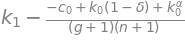

In [6]:
EK = k1 - (f(k0) - c0 + (1 - delta) * k0) / (1+g) / (1+n)
EK

オイラー条件（最適消費の条件）に対応する均衡条件を次のように定義する。

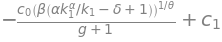

In [7]:
EC = c1 - c0 * (beta * (f(k1).diff(k1) + 1 - delta)) ** (1 / theta) / (1 + g)
EC

### 定常状態の方程式をシンボリックに表現する


`k1 == k0`, `c1 == c0` となるのが定常状態。これを行列形式（列ベクトル）で表現しておきます。これがゼロになる

In [8]:
E = sp.Matrix([EK, EC]).subs({k1: k0, c1: c0})
E

⎡                               α     ⎤
⎢          -c₀ + k₀⋅(1 - δ) + k₀      ⎥
⎢     k₀ - ──────────────────────     ⎥
⎢             (g + 1)⋅(n + 1)         ⎥
⎢                                     ⎥
⎢             ___________________     ⎥
⎢            ╱   ⎛    α        ⎞      ⎥
⎢           ╱    ⎜α⋅k₀         ⎟      ⎥
⎢  c₀⋅theta╱   β⋅⎜───── - δ + 1⎟      ⎥
⎢        ╲╱      ⎝  k₀         ⎠      ⎥
⎢- ────────────────────────────── + c₀⎥
⎣              g + 1                  ⎦

### パラメータを代入して解を求める

In [10]:
params = {
    alpha: 0.33,
    delta: 0.03,
    g: 0.02,
    n: 0.01,
    theta: 0.8,
    beta: 0.98
}

数値関数に変換する。

In [11]:
E_lam = sp.lambdify([[k0, c0]], np.squeeze(E.subs(params)))
J_lam = sp.lambdify([[k0, c0]], E.jacobian([k0, c0]).subs(params))

解く。

In [12]:
ss = fsolve(func=E_lam, x0=[4, 4], fprime=J_lam)
ss

array([10.87371171,  1.54328611])

## Step 2. 均衡経路を求める

### 準備

シンボルを一度にたくさん作る方法を覚えておくと便利である。

In [13]:
x = sp.symbols("x[:10]")
x

In [14]:
x[4]

In [15]:
x[-2:]

このようにして，シンボルのリストを作ることができる。

### 変数

求める時系列の長さを $T+1$ とすると，必要な変数は

- $k_0, k_1, k_2, \dots, k_T$
- $c_1, c_2, c_3, \dots, c_{T+1}$

仮に `T = 80` とすれば，次のように書ける。

In [16]:
T = 80
c = sp.symbols(f"c[:{T+2}]")
k = sp.symbols(f"k[:{T+1}]")

c[:3], c[-3:]

### 最適経路が満たす方程式

これを使って，最適経路が満たすべき均衡条件を定義する。`i = 0, 1, 2, ..., T-1` のそれぞれについて

- `k0` → `k[i]`
- `k1` → `k[i+1]`
- `c0` → `c[i+1]`
- `c1` → `c[i+2]`

のように設定したものを並べればよい。

In [17]:
eqm = sp.Matrix([[EK.subs({k0: k[i], k1: k[i+1], c0: c[i+1], c1: c[i+2]}),
                  EC.subs({k0: k[i], k1: k[i+1], c0: c[i+1], c1: c[i+2]})] 
                  for i in range(T)])
eqm[:3, :]

⎡                                                    _____________________    
⎢                                                   ╱   ⎛      α        ⎞     
⎢                                                  ╱    ⎜α⋅k[1]         ⎟     
⎢                                  α    c[1]⋅theta╱   β⋅⎜─────── - δ + 1⎟     
⎢       -c[1] + k[0]⋅(1 - δ) + k[0]             ╲╱      ⎝  k[1]         ⎠     
⎢k[1] - ────────────────────────────  - ────────────────────────────────── + c
⎢             (g + 1)⋅(n + 1)                         g + 1                   
⎢                                                                             
⎢                                                    _____________________    
⎢                                                   ╱   ⎛      α        ⎞     
⎢                                                  ╱    ⎜α⋅k[2]         ⎟     
⎢                                  α    c[2]⋅theta╱   β⋅⎜─────── - δ + 1⎟     
⎢       -c[2] + k[1]⋅(1 - δ) + k[1]             ╲╱  

行列形式では `fsolve` に入れられないようなので，列を積んだベクトルに変換する。

In [19]:
eqm[-3:,:]

⎡                                                         ____________________
⎢                                                        ╱   ⎛       α        
⎢                                                       ╱    ⎜α⋅k[78]         
⎢                                      α    c[78]⋅theta╱   β⋅⎜──────── - δ + 1
⎢        -c[78] + k[77]⋅(1 - δ) + k[77]              ╲╱      ⎝ k[78]          
⎢k[78] - ───────────────────────────────  - ──────────────────────────────────
⎢                (g + 1)⋅(n + 1)                           g + 1              
⎢                                                                             
⎢                                                         ____________________
⎢                                                        ╱   ⎛       α        
⎢                                                       ╱    ⎜α⋅k[79]         
⎢                                      α    c[79]⋅theta╱   β⋅⎜──────── - δ + 1
⎢        -c[79] + k[78]⋅(1 - δ) + k[78]             

In [20]:
eqm_col = eqm.T.reshape(2*T, 1)

# eqm    # 結果はすごく長い

### 解く

In [23]:
k_init = 1.0

eqm_param = eqm_col.subs(params).subs({k[0]: k_init, c[-1]: ss[1]})
eqm_param = np.squeeze(eqm_param)
eqm_num = sp.lambdify([[*k[1:], *c[1:-1]]], eqm_param)
solution = fsolve(eqm_num, x0=np.ones(2*T))
solution

array([ 1.51216965,  2.04597881,  2.58266629,  3.11060762,  3.62252561,
        4.11392377,  4.58214743,  5.02579071,  5.44430626,  5.83774031,
        6.20654822,  6.55146392,  6.87340613,  7.17341036,  7.45257946,
        7.71204749,  7.95295351,  8.17642258,  8.38355227,  8.57540325,
        8.75299295,  8.91729159,  9.06921989,  9.20964816,  9.33939632,
        9.4592347 ,  9.56988528,  9.67202339,  9.7662796 ,  9.85324177,
        9.93345723, 10.007435  , 10.07564793, 10.13853491, 10.19650297,
       10.2499293 , 10.29916321, 10.34452801, 10.38632281, 10.42482413,
       10.46028755, 10.49294918, 10.52302706, 10.55072245, 10.57622111,
       10.59969439, 10.62130031, 10.64118458, 10.65948148, 10.67631472,
       10.69179828, 10.70603708, 10.71912771, 10.73115903, 10.74221276,
       10.75236403, 10.76168184, 10.77022957, 10.77806533, 10.78524242,
       10.79180961, 10.79781152, 10.80328891, 10.80827892, 10.81281533,
       10.81692882, 10.82064712, 10.82399522, 10.82699556, 10.82

k と c を分ける。

In [24]:
k_sol = np.r_[k_init, solution[:T]]
c_sol = np.r_[solution[T:], ss[1]]
k_sol, c_sol

(array([ 1.        ,  1.51216965,  2.04597881,  2.58266629,  3.11060762,
         3.62252561,  4.11392377,  4.58214743,  5.02579071,  5.44430626,
         5.83774031,  6.20654822,  6.55146392,  6.87340613,  7.17341036,
         7.45257946,  7.71204749,  7.95295351,  8.17642258,  8.38355227,
         8.57540325,  8.75299295,  8.91729159,  9.06921989,  9.20964816,
         9.33939632,  9.4592347 ,  9.56988528,  9.67202339,  9.7662796 ,
         9.85324177,  9.93345723, 10.007435  , 10.07564793, 10.13853491,
        10.19650297, 10.2499293 , 10.29916321, 10.34452801, 10.38632281,
        10.42482413, 10.46028755, 10.49294918, 10.52302706, 10.55072245,
        10.57622111, 10.59969439, 10.62130031, 10.64118458, 10.65948148,
        10.67631472, 10.69179828, 10.70603708, 10.71912771, 10.73115903,
        10.74221276, 10.75236403, 10.76168184, 10.77022957, 10.77806533,
        10.78524242, 10.79180961, 10.79781152, 10.80328891, 10.80827892,
        10.81281533, 10.81692882, 10.82064712, 10.8

## Step 3. 可視化

2次元ベクトルの時系列は位相図を使って描くとわかりやすい。横軸に $k_t$, 縦軸に $c_{t+1}$ を取ると次のようになる。

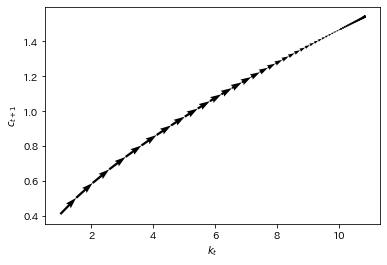

In [25]:
plt.quiver(k_sol[:-1], c_sol[:-1], 
           k_sol[1:] - k_sol[:-1], 
           c_sol[1:] - c_sol[:-1],
           scale_units='xy', angles='xy', scale=1)

plt.xlabel(r"$k_{t}$")
plt.ylabel(r"$c_{t+1}$")
plt.show()

## Step 4. 一連の作業を関数にまとめる

うまく行ったようだ。繰り返し実行したいひとまとまりの作業を関数にまとめておこう。

In [26]:
def solve_ss(eqm_k, eqm_c, param, x0):
    c, k = sp.symbols("c, k")
    eqm = sp.Matrix([eqm_k.subs({k0: k, k1: k, c0: c, c1: c}),
                     eqm_c.subs({k0: k, k1: k, c0: c, c1: c})])
    
    eqm_lam = sp.lambdify([[k, c]], np.squeeze(eqm.subs(params)))
    J_lam = sp.lambdify([[k, c]], eqm.jacobian([k, c]).subs(params))
    
    ss = fsolve(func=eqm_lam, x0=x0, fprime=J_lam)
    return ss

In [27]:
def solve_optimal_growth(eqm_k, eqm_c, k_init, c_final, param, T):
    
    c = sp.symbols(f"c[:{T+2}]")
    k = sp.symbols(f"k[:{T+1}]")
    eqm = sp.Matrix([[eqm_k.subs({k0: k[i], k1: k[i+1], c0: c[i+1], c1: c[i+2]}),
                      eqm_c.subs({k0: k[i], k1: k[i+1], c0: c[i+1], c1: c[i+2]})] 
                      for i in range(T)])
    eqm_col = eqm.T.reshape(2*T, 1)
    
    eqm_param = eqm_col.subs(param).subs({k[0]: k_init, c[-1]: c_final})
    eqm_param = np.squeeze(eqm_param)
    
    eqm_num = sp.lambdify([[*k[1:], *c[1:-1]]], eqm_param)
    solution = fsolve(eqm_num, x0=np.ones(2*T))
    
    k_sol = np.r_[k_init, solution[:T]]
    c_sol = np.r_[solution[T:], c_final]
    
    return (k_sol, c_sol)

In [28]:
params

In [29]:
ss1 = solve_ss(EK, EC, params, x0=[4, 4])
ss1

array([10.87371171,  1.54328611])

In [30]:
solve_optimal_growth(EK,EC, 1.0, ss1[1], params, 80)

(array([ 1.        ,  1.51216965,  2.04597881,  2.58266629,  3.11060762,
         3.62252561,  4.11392377,  4.58214743,  5.02579071,  5.44430626,
         5.83774031,  6.20654822,  6.55146392,  6.87340613,  7.17341036,
         7.45257946,  7.71204749,  7.95295351,  8.17642258,  8.38355227,
         8.57540325,  8.75299295,  8.91729159,  9.06921989,  9.20964816,
         9.33939632,  9.4592347 ,  9.56988528,  9.67202339,  9.7662796 ,
         9.85324177,  9.93345723, 10.007435  , 10.07564793, 10.13853491,
        10.19650297, 10.2499293 , 10.29916321, 10.34452801, 10.38632281,
        10.42482413, 10.46028755, 10.49294918, 10.52302706, 10.55072245,
        10.57622111, 10.59969439, 10.62130031, 10.64118458, 10.65948148,
        10.67631472, 10.69179828, 10.70603708, 10.71912771, 10.73115903,
        10.74221276, 10.75236403, 10.76168184, 10.77022957, 10.77806533,
        10.78524242, 10.79180961, 10.79781152, 10.80328891, 10.80827892,
        10.81281533, 10.81692882, 10.82064712, 10.8

## Step 5. 比較動学分析

例えば，次のようなシナリオを考えよう。

- 元のパラメータに対する定常状態にある経済を考える。
- 突然，$g$ が 0.02 から 0.03 に上昇した。


In [33]:
params.update({g: 0.03})
ss2 = solve_ss(EK, EC, params, x0=[4, 4])
sol2 = solve_optimal_growth(EK, EC, ss1[0], ss2[1], params, 80)

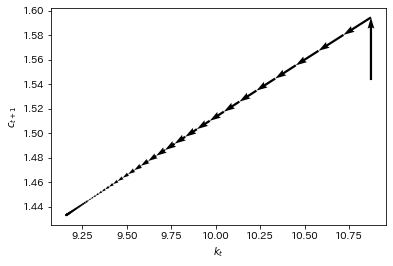

In [34]:
k_sol2 = np.r_[ss1[0], sol2[0]]    # 当初 ss1 にいる経済を考えていることに注意
c_sol2 = np.r_[ss1[1], sol2[1]]

plt.quiver(k_sol2[:-1], c_sol2[:-1], 
           k_sol2[1:] - k_sol2[:-1], 
           c_sol2[1:] - c_sol2[:-1],
           scale_units='xy', angles='xy', scale=1)

plt.xlabel(r"$k_{t}$")
plt.ylabel(r"$c_{t+1}$")
plt.show()

$g$ が突然増加すると，

- 資本（効率労働あたり）は緩やかに減少する
- 消費（効率労働あたり）は瞬間的に増えて，徐々に減少しはじめる。

このような突然の消費の変化は，貯蓄率の変化を除いて，ソローモデルでは起こらない。ラムゼーモデルでは，成長率の変化によって，効率労働1単位あたりの分け前が将来的にも減少することを織り込んで行動するので，変化が現時点で発生する。

このように，**将来的な経済環境の変化を織り込んだ家計の行動分析ができるようになるので，ラムゼーモデルは多くのマクロモデルの基礎理論として使われている**。

ここから先の流れを大雑把に言えば，

- ラムゼーモデルに内生的な労働供給を組み込んだリアル・ビジネス・サイクルモデル（RBCモデル）
- RBCモデルに市場不完全性を組み込んだ種々のニューケインジアンタイプのモデル（DSGEモデル）
- 代表的個人の仮定を弱めた，異質な個人からなるニューケインジアンモデル（HANKモデル）

のように発展していく。このDSGEモデル, HANKモデルが経済政策分析の主要ツールになっている。




## **** おわり ****

開講当初は，ニューケインジアンのモデルにまで進みたいという思っていたのですが，キリがよくなったので，これで授業は終わりにしたいと思います。あとは引き続き学ぶ意欲のある方が，ご自身で勉強を進めていく方がよい気がしてきました。（すでにだいぶ詰め込んだ気がしますので）

この授業の内容では物足りないという人が進んだ内容を学ぶためには，大学院向けの教科書を選ぶことになると思います。以下の2冊＋雑誌の連載をおすすめします。

- 蓮見亮 (2020)『動学マクロ経済学へのいざない』日本評論社
- 加藤涼 (2006)『現代マクロ経済学講義』東洋経済新報社
- 北尾他 (2019-2020) 『経済セミナー』の連載



## **** アンケート ****

回答方法:

[x] チェックしている  
[ ] チェックしていない

### 難易度

[ ] 簡単  
[ ] 普通  
[x] 難しい 

### トピック

[ ] 少ない  
[x] 普通  
[ ] 多い  

### トピックの選択

[ ] 悪い  
[ ] 普通  
[x] 良い  

「悪い」を選んだ人は，どのようなトピックを学びたかったですか？:



### 授業方法

マクロ関連理論を Python でコーディングするという方針について，どういう印象を受けましたか。

[ ] Python が難しすぎてマクロ経済理論の勉強に集中できない  
[ ] 無  
[x] マクロ経済理論をよりよく学ぶことができる  



### 感想




これまでコマンドプロンプトで勉強していたので、jupiter notebookやipythonの使い方を知ることができてよかったです（今後もjupiter notebookを使って勉強していきます。）
これまでのマクロ経済学の復習に加え新たなモデルをpythonを使いながら学ぶことができ、紙とペンで学ぶより意欲的に取り組めたと感じています。
私は個人的にkaggleを通して機械学習の勉強をしています。マネジメント学類ではpythonを扱う機会がないのでpythonを用いた授業を非常に楽しみにしていました。今後も学ぶ機会があれば参加したいと思っています。
半期の間ありがとうございました。


